In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [71]:
def temperature_series(n):
    hrs=np.arange(n) #[0,1,2...999]
    temp=np.sin(0.1*hrs) +0.5*np.random.randn(n)
    return temp #[32.4,45.3 ....]

n=1000
temp_series=temperature_series(n)

In [72]:
#split data
#x---[15,16,17]   #y---[18]
def splitting(window_size,temp_series):
    x,y=[],[]
    for i in range(len(temp_series) - window_size):
        x.append(temp_series[i:i+window_size])
        y.append(temp_series[i+window_size])
    return np.array(x),np.array(y)

window_size=20
x,y=splitting(window_size,temp_series)
x=x[...,np.newaxis]   #model requires 3d data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [74]:
model=Sequential([
    LSTM(64,input_shape=(window_size,1)),
        Dense(1)
])

In [75]:
model.compile(optimizer='adam',loss='mse')

In [76]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=2)

Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.8154 - val_loss: 0.4485
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4372 - val_loss: 0.3100


In [77]:
y_pred=model.predict(x_test).squeeze()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [78]:
y_pred

array([-0.7270677 ,  0.8772592 , -0.39824057,  0.5938096 ,  0.8381288 ,
       -0.5533351 , -0.7497579 , -0.01303971, -0.5460945 ,  0.794037  ,
        0.8734957 ,  0.74172956, -0.6167036 ,  0.53721964,  0.43118182,
        0.48831925, -0.3216794 ,  0.6200875 , -0.67839265,  0.5351509 ,
       -0.78145707, -0.33543783, -0.62052995,  0.18715349,  0.5078705 ,
       -0.8554807 ,  0.0926898 ,  1.0428965 ,  0.14382498,  0.02379615,
       -0.7366886 , -0.66833615, -0.42388967, -0.73365086, -0.62268305,
        0.80778646, -1.0144031 ,  0.87505186, -0.4048829 , -0.39984   ,
       -0.7777655 , -0.7360871 , -0.07336728, -0.67544794, -0.01139513,
       -0.38595095,  0.70589316, -0.7517302 ,  0.7847397 , -0.29168445,
       -0.13473433,  0.68442124, -0.34650284,  0.97479206,  1.015965  ,
       -0.00476535, -0.93621135,  0.97774917,  0.52804464, -0.04384062,
       -0.4395031 , -0.07367808, -0.39224377,  0.5524461 ,  0.21105552,
        0.5011669 , -0.12482684,  0.48554233, -0.7643008 ,  0.96

Text(0.5, 1.0, 'Comparing the test data')

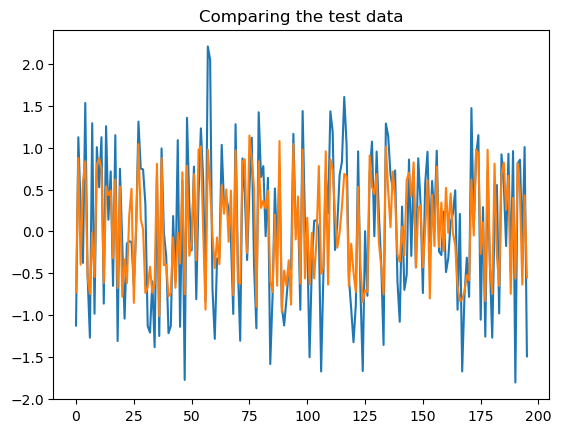

In [93]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(y_test)),y_test,label='Original Test series')
plt.plot(np.arange(len(y_test)),y_pred,label='Predicted Test series')
plt.title('Comparing the test data')